<a href="https://colab.research.google.com/github/preetamjumech/DL_DNN_from_Scratch/blob/main/Preetam_Saha_DNN_MNIST_practice_24_09_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/MorvanZhou/PyTorch-Tutorial/raw/master/tutorial-contents-notebooks/mnist/processed/training.pt
!wget https://github.com/MorvanZhou/PyTorch-Tutorial/raw/master/tutorial-contents-notebooks/mnist/processed/test.pt

--2022-09-24 10:34:15--  https://github.com/MorvanZhou/PyTorch-Tutorial/raw/master/tutorial-contents-notebooks/mnist/processed/training.pt
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt [following]
--2022-09-24 10:34:15--  https://raw.githubusercontent.com/MorvanZhou/PyTorch-Tutorial/master/tutorial-contents-notebooks/mnist/processed/training.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47520431 (45M) [application/octet-stream]
Saving to: ‘training.pt.1’

training.pt.1       100%[===================

In [2]:
import torch, torchsummary
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.nn.modules import dropout

In [3]:
(x_train,y_train) = torch.load("training.pt")

In [4]:
x_train.shape

torch.Size([60000, 28, 28])

In [5]:
y_train.shape

torch.Size([60000])

In [6]:
from google.colab.patches import cv2_imshow

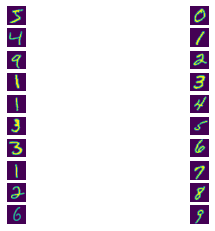

In [7]:
for i in range(20):
  plt.subplot(10,2,i+1)
  plt.axis("off")
  plt.imshow(x_train[i].numpy())

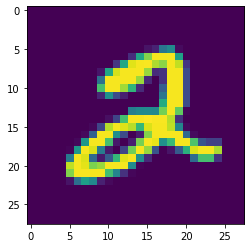

In [8]:
plt.imshow(x_train[5])

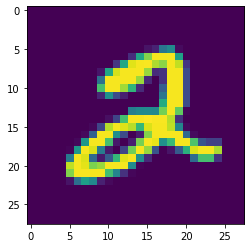

In [9]:
plt.imshow(x_train[5].numpy())

In [10]:
x_train = x_train.reshape(-1,28*28)

In [11]:
x_train.shape

torch.Size([60000, 784])

In [12]:
(x_test, y_test) = torch.load("test.pt")

In [13]:
x_test.shape

torch.Size([10000, 28, 28])

In [14]:
y_test.shape

torch.Size([10000])

In [15]:
x_test = x_test.reshape(-1,28*28)

In [16]:
x_test.shape

torch.Size([10000, 784])

In [17]:
from torch.utils.data import DataLoader, TensorDataset

In [18]:
train_loader = DataLoader(TensorDataset(x_train.float(),y_train),
                          batch_size=64,shuffle=True)
val_loader = DataLoader(TensorDataset(x_test.float(),y_test),
                        batch_size=32,shuffle=False)

In [40]:
class DNN_MNIST(nn.Module):
  def __init__(self):
    super(DNN_MNIST,self).__init__()

    self.h1 = nn.Linear(in_features=28*28, out_features = 512)
    self.h2 = nn.Linear(in_features=512, out_features = 256)
    self.h3 = nn.Linear(in_features=256, out_features = 128)
    self.h4 = nn.Linear(in_features=128, out_features = 64)
    self.out = nn.Linear(in_features=64, out_features = 10)
    self.bn1 = nn.BatchNorm1d(num_features=512)
    self.bn2 = nn.BatchNorm1d(num_features=256)
    self.bn3 = nn.BatchNorm1d(num_features=128)
    self.dropout = nn.Dropout(p=0.4)

  def forward(self,x):
    x = F.relu(self.h1(x))
    x = self.bn1(x)
    x = self.dropout(x)

    x = F.relu(self.h2(x))
    x = self.bn2(x)
    x = self.dropout(x)

    x = F.relu(self.h3(x))
    x = self.bn3(x)
    x = self.dropout(x)

    x = F.relu(self.h4(x))
    x = self.dropout(x)

    x = F.relu(self.out(x))
    return x




In [41]:
dnn_model = DNN_MNIST()

In [ ]:
list(dnn_model.parameters())

In [43]:
opt = Adam(dnn_model.parameters(),lr=0.001)

In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [45]:
dnn_model = dnn_model.to(device)

In [46]:
for epoch in range(30):
  training_loss = 0.0

  for batch, target in train_loader:
    batch = batch.to(device)
    target = target.to(device)

    opt.zero_grad()
    output = dnn_model(batch)
    loss = F.cross_entropy(output,target)
    loss.backward()
    opt.step()
    training_loss += loss.item()


  val_loss =0.0

  for val_batch,val_target in val_loader:
    val_batch = val_batch.to(device)
    val_target = val_target.to(device)

    pred = dnn_model(val_batch)
    loss_val = F.cross_entropy(pred,val_target)
    val_loss += loss_val.item()

  if (epoch+1) % 5 ==0:
    print(f"Training Loss: {training_loss}")
    print(f"Test Loss: {val_loss}")

Training Loss: 137.9378000292927
Test Loss: 60.4954304988496
Training Loss: 103.1808210639283
Test Loss: 56.04957369924523
Training Loss: 82.78639034321532
Test Loss: 49.227158641966525
Training Loss: 71.66335741733201
Test Loss: 49.35734463640256
Training Loss: 63.77008862164803
Test Loss: 48.98031837126473
Training Loss: 54.200226937420666
Test Loss: 49.37964181636926


In [47]:
final_pred_vals = dnn_model(x_test.float().to(device)).detach().cpu().numpy()

In [51]:
final_pred_vals[0]

array([ 0.        ,  6.571716  ,  0.        ,  5.781776  ,  0.        ,
        0.54756397,  0.        , 14.82646   ,  1.7388761 ,  7.4247947 ],
      dtype=float32)

In [48]:
preds = np.argmax(final_pred_vals,axis=1)

In [52]:
preds[0]

7

In [49]:
import pandas as pd

In [53]:
pd.crosstab(preds,y_test.numpy())

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,964,0,6,1,2,2,4,2,2,3
1,0,1120,1,0,0,0,2,2,2,2
2,2,2,1005,4,4,1,1,14,3,0
3,2,0,4,985,0,9,1,4,5,2
4,1,0,1,0,955,0,3,2,2,8
5,2,2,0,14,0,869,6,0,7,6
6,5,3,1,0,2,5,940,0,5,0
7,1,2,5,2,1,2,0,994,2,3
8,1,6,9,2,2,1,1,2,943,6


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [55]:
confusion_matrix(preds,y_test)

array([[ 964,    0,    6,    1,    2,    2,    4,    2,    2,    3],
       [   0, 1120,    1,    0,    0,    0,    2,    2,    2,    2],
       [   2,    2, 1005,    4,    4,    1,    1,   14,    3,    0],
       [   2,    0,    4,  985,    0,    9,    1,    4,    5,    2],
       [   1,    0,    1,    0,  955,    0,    3,    2,    2,    8],
       [   2,    2,    0,   14,    0,  869,    6,    0,    7,    6],
       [   5,    3,    1,    0,    2,    5,  940,    0,    5,    0],
       [   1,    2,    5,    2,    1,    2,    0,  994,    2,    3],
       [   1,    6,    9,    2,    2,    1,    1,    2,  943,    6],
       [   2,    0,    0,    2,   16,    3,    0,    8,    3,  979]])

In [56]:
accuracy_score(preds,y_test)

0.9754

In [59]:
torchsummary.summary(dnn_model,input_size=(784,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         401,920
       BatchNorm1d-2                  [-1, 512]           1,024
           Dropout-3                  [-1, 512]               0
            Linear-4                  [-1, 256]         131,328
       BatchNorm1d-5                  [-1, 256]             512
           Dropout-6                  [-1, 256]               0
            Linear-7                  [-1, 128]          32,896
       BatchNorm1d-8                  [-1, 128]             256
           Dropout-9                  [-1, 128]               0
           Linear-10                   [-1, 64]           8,256
          Dropout-11                   [-1, 64]               0
           Linear-12                   [-1, 10]             650
Total params: 576,842
Trainable params: 576,842
Non-trainable params: 0
-------------------------------